In [80]:
#Activity 1:Collect the dataset
#Activity 1.1:Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [81]:
#Activity 1.2:Reading the Dataset
import pandas as pd
df=pd.read_csv("E:\\NMDS\\FlightBooking.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [83]:
#import prision
#from prision import Category
#for i in category:
    #print(i,data[i].unique())

In [84]:
#We now split the Date column to extract the 'Date','Month' and 'Year' values, and store them in 
#new columns in our data frame
df.date_of_Journey=df.Date_of_Journey.str.split('/')
df.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [85]:
#Traiting the data_column
df['Date']=df.Date_of_Journey.str[0]
df['Month']=df.Date_of_Journey.str[1]
df['Year']=df.Date_of_Journey.str[2]

In [86]:
#Split the Route column
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [87]:
#We split the data in route column
df.Route=df.Route.astype(str).str.split('->')
df.Route


0                    [BLR ? DEL]
1        [CCU ? IXR ? BBI ? BLR]
2        [DEL ? LKO ? BOM ? COK]
3              [CCU ? NAG ? BLR]
4              [BLR ? NAG ? DEL]
                  ...           
10678                [CCU ? BLR]
10679                [CCU ? BLR]
10680                [BLR ? DEL]
10681                [BLR ? DEL]
10682    [DEL ? GOI ? BOM ? COK]
Name: Route, Length: 10683, dtype: object

In [88]:
df['City1']=df.Route.str[0]
df['City2']=df.Route.str[1]
df['City3']=df.Route.str[2]
df['City4']=df.Route.str[3]
df['City5']=df.Route.str[4]
df['City6']=df.Route.str[5]

In [89]:
#In similar manner, we split the Dep_time column, and create separate for departue hours and minutes
df.Dep_Time=df.Dep_Time.astype(str).str.split(':')
df['Dep_Time_Hour']=df.Dep_Time.str[0]
df['Dep_Time_Mins']=df.Dep_Time.str[1]


In [90]:
#We also split the Arrival_Time Column
df.Arrival_Time=df.Arrival_Time.astype(str).str.split('')
df['Arrival_date']=df.Arrival_Time.str[1]
df['Time_of_Arrival']=df.Arrival_Time.str[0]

In [91]:
df['Time_of_Arrival']=df.Time_of_Arrival.astype(str).str.split(':')
df['Arrival_Time_Hour']=df.Time_of_Arrival.str[0]
df['Arrival_Time_Mins']=df.Time_of_Arrival.str[1]

In [92]:
#we also treat the 'Total_stops', column, and replace non-stop flights with 0 values and
#extract the integer part of the "Total_Stops"
df.Total_Stops.replace('npn_stop',0,inplace=True)
df.Total_Stops=df.Total_Stops.str.split('')
df.Total_Stops=df.Total_Stops.str[0]

In [93]:
df.Additional_Info.unique()


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [94]:
#df.Additional_Info.replace('No Info','No Info',inplace=True)

In [95]:
df.shape

(10683, 26)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Date_of_Journey    10683 non-null  object 
 2   Source             10683 non-null  object 
 3   Destination        10683 non-null  object 
 4   Route              10683 non-null  object 
 5   Dep_Time           10683 non-null  object 
 6   Arrival_Time       10683 non-null  object 
 7   Duration           10683 non-null  object 
 8   Total_Stops        10682 non-null  object 
 9   Additional_Info    10683 non-null  object 
 10  Price              10683 non-null  int64  
 11  Date               10683 non-null  object 
 12  Month              10683 non-null  object 
 13  Year               10683 non-null  object 
 14  City1              10683 non-null  object 
 15  City2              0 non-null      float64
 16  City3              0 n

In [97]:
#we also drop some columns  like 'city6' an 'city5', since majority of the data in these columns was NaN(null)
#df.drop(['City4','City5','City6'],axis=1,inplace=True)
#df.drop(['Date_of_Journey','Route','Dep_Time','Duration'],axis=1,inplace=True)
#df.drop(['Time_of_Arrival'],axis=1,inplace=True)

In [98]:
df.isnull().sum()

Airline                  0
Date_of_Journey          0
Source                   0
Destination              0
Route                    0
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    0
City2                10683
City3                10683
City4                10683
City5                10683
City6                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date             0
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins    10683
dtype: int64

In [99]:
#Activity 2.1:Replacing Missing Values
#filling City3 as None, the missing value are less
df['City3'].fillna('None,inplace=True')


0        None,inplace=True
1        None,inplace=True
2        None,inplace=True
3        None,inplace=True
4        None,inplace=True
               ...        
10678    None,inplace=True
10679    None,inplace=True
10680    None,inplace=True
10681    None,inplace=True
10682    None,inplace=True
Name: City3, Length: 10683, dtype: object

In [100]:
#filling Arrival_Date as Departure_Date
df['Arrival_date'].fillna((df['Date']),inplace=True)

In [101]:
#filling Travel_Mins as Zero(0)
#df['Travel_Mins'].fillna(0,inplace=True)
df['Arrival_Time_Mins'].fillna(0,inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Date_of_Journey    10683 non-null  object 
 2   Source             10683 non-null  object 
 3   Destination        10683 non-null  object 
 4   Route              10683 non-null  object 
 5   Dep_Time           10683 non-null  object 
 6   Arrival_Time       10683 non-null  object 
 7   Duration           10683 non-null  object 
 8   Total_Stops        10682 non-null  object 
 9   Additional_Info    10683 non-null  object 
 10  Price              10683 non-null  int64  
 11  Date               10683 non-null  object 
 12  Month              10683 non-null  object 
 13  Year               10683 non-null  object 
 14  City1              10683 non-null  object 
 15  City2              0 non-null      float64
 16  City3              0 n

In [103]:
df.skew()

Price                1.812552
Date                 1.298651
City2                     NaN
City3                     NaN
City4                     NaN
City5                     NaN
City6                     NaN
Dep_Time_Hour        0.113073
Dep_Time_Mins        0.167029
Arrival_date         0.151783
Arrival_Time_Mins    0.000000
dtype: float64

In [104]:
#changing the numerical columns from object to int
#df.Total_Stops=df.Total_Stops.astype('int64')
df.Date=df.Date.astype('int64')
df.Month=df.Month.astype(str)
df.Year=df.Year.astype(str)
df.Dep_Time_Hour=df.Dep_Time_Hour.astype('int64')
df.Dep_Time_Hour=df.Dep_Time_Hour.astype('int64')
df.Dep_Time_Mins=df.Dep_Time_Mins.astype('int64')


In [105]:
[df['Arrival_Time_Hour']=='5m']

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 10678    False
 10679    False
 10680    False
 10681    False
 10682    False
 Name: Arrival_Time_Hour, Length: 10683, dtype: bool]

In [106]:
df.drop(index=6474,inplace=True,axis=1)

In [107]:
#df.Travel_Hours=df.Travel_Hours.astype('int64')
#df.Arrival_Time_Hour=df.Arrival_Time_Hour.astype('int64')

In [108]:
#Creating a list of Different types of Columns
Categorical=['Airline','Source','Destination','Additional_Info','City1']
Numerical=['Total_Stops','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date',
           'Arrival_Time_Hour','Arrival_Time_Mins','Travel_Time_Mins','Travel_Hours','Travel_Mins']

In [109]:
#Activity 2.2: Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.Airline=le.fit_transform(df.Airline)
df.Source=le.fit_transform(df.Source)
df.Destination=le.fit_transform(df.Destination)
df.Total_Stops=le.fit_transform(df.Total_Stops)
df.City1=le.fit_transform(df.City1)
df.City2=le.fit_transform(df.City2)
df.City3=le.fit_transform(df.City3)
df.Additional_info=le.fit_transform(df.Additional_Info)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,City3,City4,City5,City6,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Arrival_Time_Mins
0,3,24/03/2019,0,5,[BLR ? DEL],"[22, 20]","[, 0, 1, :, 1, 0, , 2, 2, , M, a, r, ]",2h 50m,0,No info,...,0,NaN,NaN,NaN,22,20,0,[],,0.0
1,1,1/05/2019,3,0,[CCU ? IXR ? BBI ? BLR],"[05, 50]","[, 1, 3, :, 1, 5, ]",7h 25m,0,No info,...,0,NaN,NaN,NaN,5,50,1,[],,0.0
2,4,9/06/2019,2,1,[DEL ? LKO ? BOM ? COK],"[09, 25]","[, 0, 4, :, 2, 5, , 1, 0, , J, u, n, ]",19h,0,No info,...,0,NaN,NaN,NaN,9,25,0,[],,0.0
3,3,12/05/2019,3,0,[CCU ? NAG ? BLR],"[18, 05]","[, 2, 3, :, 3, 0, ]",5h 25m,0,No info,...,0,NaN,NaN,NaN,18,5,2,[],,0.0
4,3,01/03/2019,0,5,[BLR ? NAG ? DEL],"[16, 50]","[, 2, 1, :, 3, 5, ]",4h 45m,0,No info,...,0,NaN,NaN,NaN,16,50,2,[],,0.0


In [110]:
#Activity 2.3: Output Columns
df=df[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date',
           'Arrival_Time_Hour','Arrival_Time_Mins','Price']]
df.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,3,0,5,2,4,/,22,20,0,,0.0,3897
1,1,3,0,1,/,0,5,50,1,,0.0,7662
2,4,2,1,9,/,0,9,25,0,,0.0,13882
3,3,3,0,1,2,/,18,5,2,,0.0,6218
4,3,0,5,0,1,/,16,50,2,,0.0,13302


In [111]:
#Activity 3:Exploratory Data Analyis
#Activity 3.1: Descriptive statistical
df.describe()

,Airline,Source,Destination,Date,Dep_Time_Hour,Dep_Time_Mins,Arrival_Time_Mins,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000
mean,3.966205,1.952069,1.435967,2.941678,12.490358,24.408819,0.0,9086.292735
std,2.352090,1.177110,1.474773,2.732095,5.748819,18.767225,0.0,4610.885695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1759.000000
25%,3.000000,2.000000,0.000000,1.000000,8.000000,5.000000,0.0,5277.000000
50%,4.000000,2.000000,1.000000,2.000000,11.000000,25.000000,0.0,8372.000000
75%,4.000000,3.000000,2.000000,3.000000,18.000000,40.000000,0.0,12373.000000
max,11.000000,4.000000,5.000000,9.000000,23.000000,55.000000,0.0,79512.000000


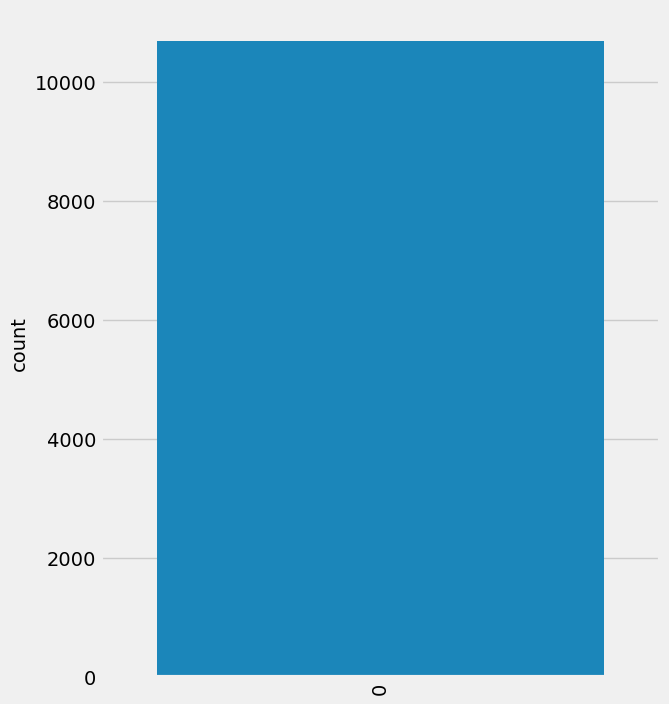

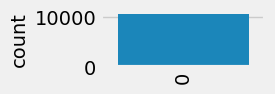

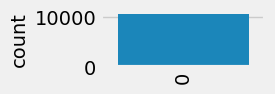

KeyError: 'Additional_Info'

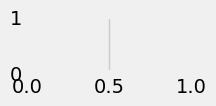

In [112]:
#Ploting Countplots for Categorical Data
import matplotlib.pyplot as plt
import seaborn as sns
c=1
plt.figure(figsize=(20,45))
for i in Categorical:
    plt.subplot(6,3,c)
    sns.countplot(df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
    plt.show()

<Axes: xlabel='Price', ylabel='Density'>

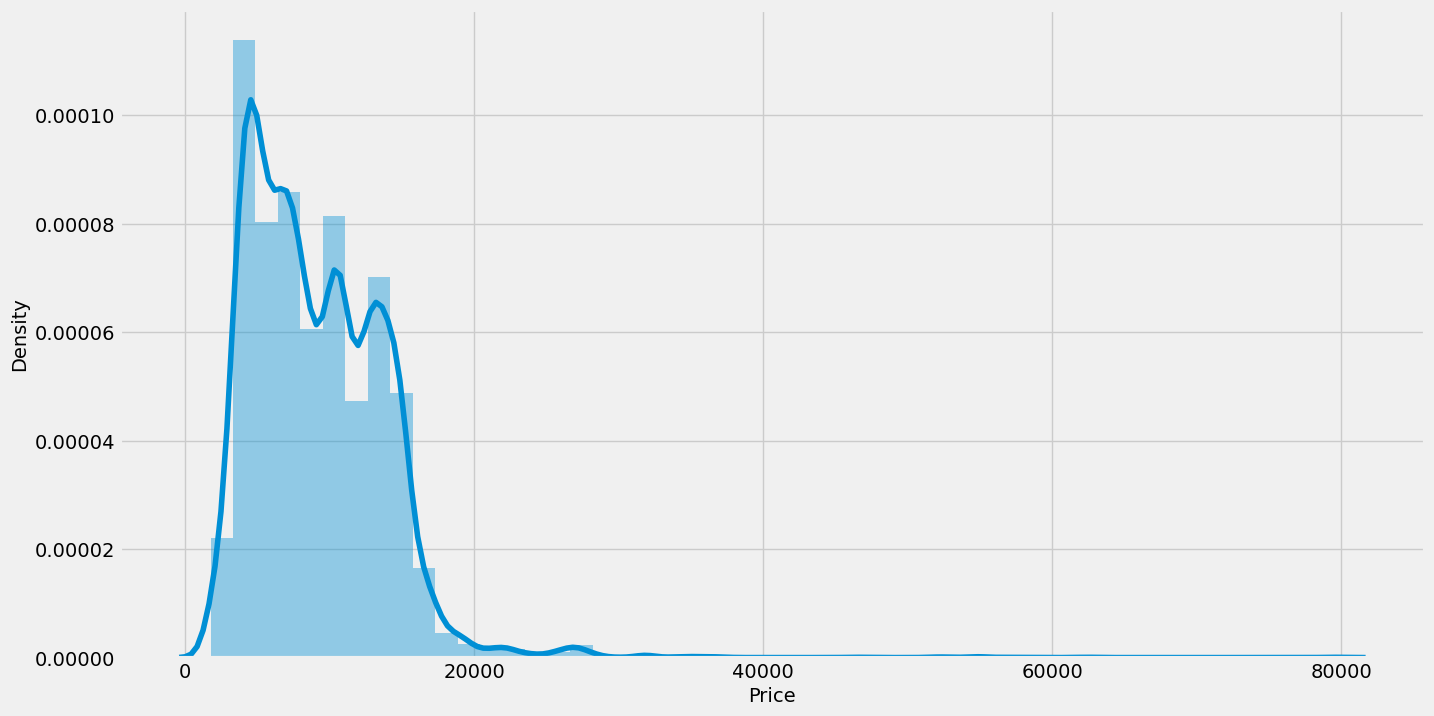

In [114]:
#Distribution of price column
plt.figure(figsize=(15,8))
sns.distplot(df.Price)

<Axes: >

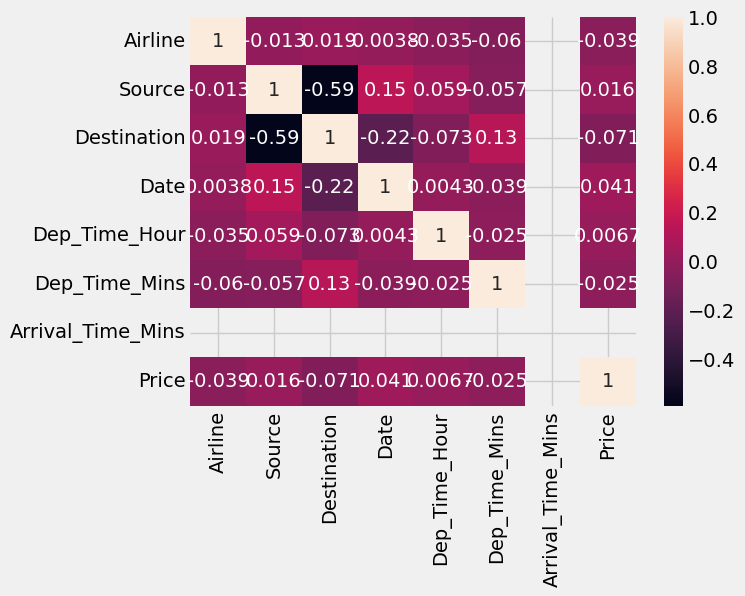

In [113]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

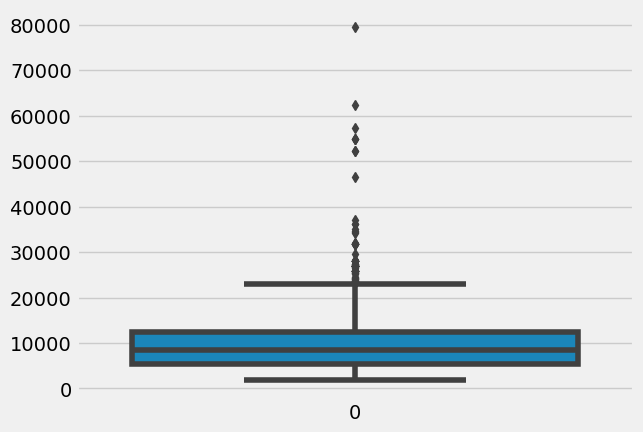

In [115]:
#Detecting Outliers
import seaborn as sns 
sns.boxplot(df['Price'])

In [ ]:
#Scaling the data
df=df[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Arrival_date',
           'Arrival_Time_Hour','Arrival_Time_Mins','Price']]
y=df['Price']
x=df.drop(columns=['Price'],axis=1)
import pandas as pd
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
#x_scaled=ss.fit_transform(x)
#x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x.head()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.tail()

In [ ]:
#Model Building 
#model 1:RandomForestClassifier,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor,AdaBoostRegressor
rfr=RandomForestClassifier()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score,mean_absoulte_error,mean_squared_error
for i in [rfr,gb,ad]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
test_score=r2_score(y_test,y_pred)
train_score=r2_score(y_train,i.predict(x_train))
if abs(train_score-test_score)<0.2:
    print(i)
    print("R2 score is",r2_score(y_test,y_pred))
    print("R2 for train data",r2_score(y_train,i.predict(x_train)))
    print("Mean Absoult Error is",mean_absolute_error(y_pred,y_test))
    print("Mean Squared Error is",mean_squared_error(y_pred,y_test))
    print("Root Mean Squared Error is",(mean_squared_error(y_pred,y_test,squared=False)))

In [ ]:
#model 2:RandomForestClassifier,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from.sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absoulte_error,mean_squared_error
knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()
for i in [knn,svr,dt]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
test_score=r2_score(y_test,y_pred)
train_score=r2_score(y_train,i.predict(x_train))
if abs(train_score-test_score)<0.1:
    print(i)
    print("R2 score is",r2_score(y_test,y_pred))
    print("R2 for train data",r2_score(y_train,i.predict(x_train)))
    print("Mean Absoult Error is",mean_absolute_error(y_pred,y_test))
    print("Mean Squared Error is",mean_squared_error(y_pred,y_test))
    print("Root Mean Squared Error is",(mean_squared_error(y_pred,y_test,squared=False)))



In [ ]:
#model 3: Checking Cross Validation for RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor,AdaBoostRegressor
rfr=RandomForestClassifier()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()
for i in [rfr,gb,ad]:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
for i in range(2,5):
    CV=cross_val_score(rfr,x,y,CV=i)
print(rfr,CV.mean())